Kunmanee Bubphamanee
Tutorial 25


In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
times, masses, positions, velocities = np.load('/home/zabe0091/astr2600/noisy_sunearth.npy')

In [76]:
print times, masses, positions, velocities

[  0.00000000e+00   8.64000000e+03   1.72800000e+04 ...,   8.63740800e+07
   8.63827200e+07   8.63913600e+07] [  1.98900000e+30   5.97200000e+24] [[[ -2.06429356e+09   6.88121671e+09   1.04649029e+10 ...,  -7.81924917e+09
    -7.19207306e+09   3.65289897e+10]
  [  5.02731723e+09  -2.12069849e+10  -4.55806408e+10 ...,   8.95651260e+09
     2.83084515e+10  -1.59514509e+10]
  [  6.34281253e+09  -1.26195893e+10   3.92442919e+09 ...,   6.78568100e+09
    -4.69095428e+10  -8.20254161e+09]]

 [[  1.63491938e+11   1.59635508e+11   1.66920603e+11 ...,  -5.79010947e+10
    -8.98139232e+09   8.45562380e+09]
  [ -4.11044451e+10   4.18337213e+10   4.48674409e+10 ...,  -1.05385783e+11
    -1.66244899e+11  -1.59715426e+11]
  [ -1.96271035e+10   4.57023655e+09  -1.10310286e+10 ...,   7.66177950e+09
    -2.52881387e+09   1.34969391e+10]]] [[[  1.41050979e-02   1.96423925e-03  -1.87009448e-03 ...,  -8.68112871e-02
    -8.11513379e-02  -7.22447322e-02]
  [ -1.02315556e-01  -8.69469811e-02  -1.11405074e-0

In [77]:
t= times/24/60/60
x_Earth = positions[1,0,:]

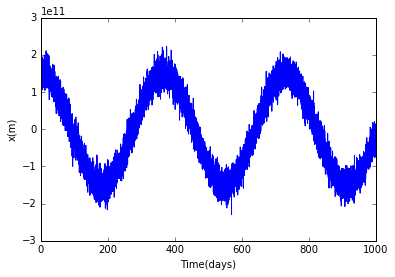

In [78]:
plt.plot(t, x_Earth)
plt.ylabel('x(m)')
plt.xlabel('Time(days)')

In [79]:
def generateModel(period):
    '''Generate a model for the x-position of the Earth, 
    given some orbital period (in days).'''
    
    # convert the times into orbital phase
    phase = 2*np.pi*t/period
    
    # define the semimajor axis (1 AU, in meters)
    a = 1.496e+11
    
    # return a model for the x-position, given that period
    return a*np.cos(phase)


In [80]:
generateModel(20)

array([  1.49600000e+11,   1.49526181e+11,   1.49304799e+11, ...,
         1.48936070e+11,   1.49304799e+11,   1.49526181e+11])

In [81]:
def calculateBadness(period, plot=False):
    '''Calculate the "badness-of-fit" for some period,
    as the sum of the squares of the residuals. This is 
    basically the chi-squared, but just not scaled by 
    any estimate of the intrinsic uncertainties.
    
    If the keyword argument "plot" is set to True, 
    this will produce a plot comparing the data and 
    the model. If it is set to False, no plot will 
    be drawn. Either way, the function returns on
    numerical value for this badness-of-fit.'''
    
    # calculate the differences between our data and our model
    d = x_Earth 
    #xposition
    m = generateModel(period)
    
    # calculate the badness of the fit
    b = np.sum((d-m)**2)
    # (this b is like chi-squared, but ignoring the sigmas)
    
    # this will generate a plot, if the plot keyword is set to True
    if plot:
        # plot the data
        plt.plot(t, d)
        # plot the model curve         
        plt.plot(t, m, color='orange', linewidth=5, alpha=0.7)
        plt.ylabel('x (m)')
        plt.xlabel('Time (days)')
        template = 'P={:.1f} days, $\sum(data - model)^2$ = {:.3}'
        plt.title(template.format(period, b))
        plt.show()

    # return the badness of fit, given the input period
    return b

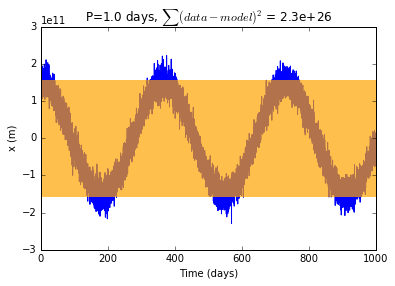

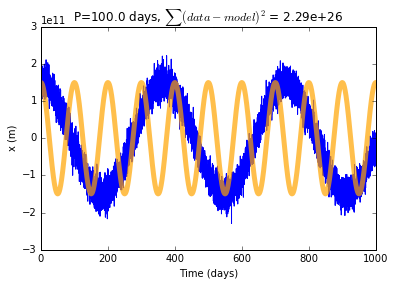

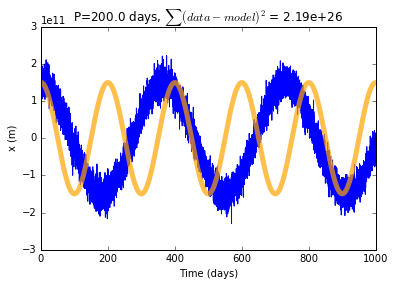

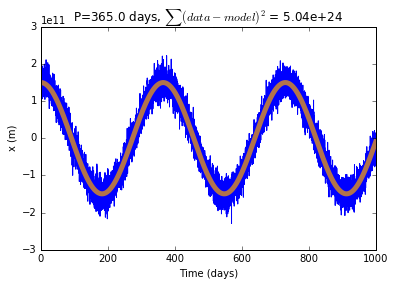

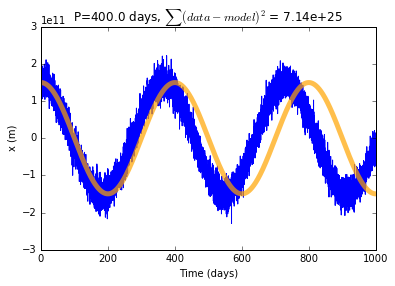

In [93]:
assume=[1,100,200,365,400]
for i in assume:
    calculateBadness(i, plot=True)

In [91]:
period = np.linspace(1,1000,1000)
print period

[    1.     2.     3.     4.     5.     6.     7.     8.     9.    10.
    11.    12.    13.    14.    15.    16.    17.    18.    19.    20.
    21.    22.    23.    24.    25.    26.    27.    28.    29.    30.
    31.    32.    33.    34.    35.    36.    37.    38.    39.    40.
    41.    42.    43.    44.    45.    46.    47.    48.    49.    50.
    51.    52.    53.    54.    55.    56.    57.    58.    59.    60.
    61.    62.    63.    64.    65.    66.    67.    68.    69.    70.
    71.    72.    73.    74.    75.    76.    77.    78.    79.    80.
    81.    82.    83.    84.    85.    86.    87.    88.    89.    90.
    91.    92.    93.    94.    95.    96.    97.    98.    99.   100.
   101.   102.   103.   104.   105.   106.   107.   108.   109.   110.
   111.   112.   113.   114.   115.   116.   117.   118.   119.   120.
   121.   122.   123.   124.   125.   126.   127.   128.   129.   130.
   131.   132.   133.   134.   135.   136.   137.   138.   139.   140.
   141

In [84]:
Badness=[]
for i in period:
    Badness.append(calculateBadness(i, plot=False))
#calculateBadness(period, plot=False)
print Badness

[2.3036228182964018e+26, 2.3035641628738736e+26, 2.3040184990535279e+26, 2.3076947680584903e+26, 2.304426976318219e+26, 2.3055200701049666e+26, 2.2955787060474297e+26, 2.3093995777101171e+26, 2.30519380608443e+26, 2.3153953486524817e+26, 2.2966595534255714e+26, 2.3010512158071699e+26, 2.3080833021538603e+26, 2.3051919191884902e+26, 2.2994230288392388e+26, 2.3156128041943146e+26, 2.3012150290610417e+26, 2.3013114686252957e+26, 2.3074490170340977e+26, 2.3068872278356482e+26, 2.3046393998731683e+26, 2.3038705563872813e+26, 2.3063622994246615e+26, 2.3154954603989081e+26, 2.3107216136734849e+26, 2.3029502643493055e+26, 2.2958848320363336e+26, 2.2989918906692363e+26, 2.3121391051551192e+26, 2.3123584505281467e+26, 2.3166849030241131e+26, 2.3097505049628972e+26, 2.3171929112342259e+26, 2.3004039122275509e+26, 2.3109767356699794e+26, 2.300321319634059e+26, 2.3035665361439826e+26, 2.3049944900608246e+26, 2.3048933730207338e+26, 2.3072844774820955e+26, 2.3017810769268537e+26, 2.3049065554388753e

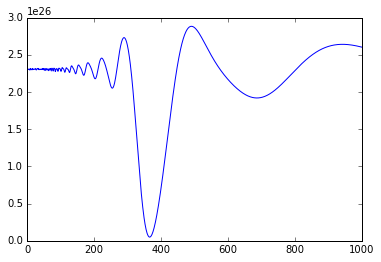

In [85]:
plt.plot(period,Badness)

In [86]:
print Badness


[2.3036228182964018e+26, 2.3035641628738736e+26, 2.3040184990535279e+26, 2.3076947680584903e+26, 2.304426976318219e+26, 2.3055200701049666e+26, 2.2955787060474297e+26, 2.3093995777101171e+26, 2.30519380608443e+26, 2.3153953486524817e+26, 2.2966595534255714e+26, 2.3010512158071699e+26, 2.3080833021538603e+26, 2.3051919191884902e+26, 2.2994230288392388e+26, 2.3156128041943146e+26, 2.3012150290610417e+26, 2.3013114686252957e+26, 2.3074490170340977e+26, 2.3068872278356482e+26, 2.3046393998731683e+26, 2.3038705563872813e+26, 2.3063622994246615e+26, 2.3154954603989081e+26, 2.3107216136734849e+26, 2.3029502643493055e+26, 2.2958848320363336e+26, 2.2989918906692363e+26, 2.3121391051551192e+26, 2.3123584505281467e+26, 2.3166849030241131e+26, 2.3097505049628972e+26, 2.3171929112342259e+26, 2.3004039122275509e+26, 2.3109767356699794e+26, 2.300321319634059e+26, 2.3035665361439826e+26, 2.3049944900608246e+26, 2.3048933730207338e+26, 2.3072844774820955e+26, 2.3017810769268537e+26, 2.3049065554388753e

In [87]:
print np.argmin(Badness)
print np.min(Badness)

365
4.99210999521e+24


In [88]:
#At index 365. Badness-of-fit value is the minimum.
print "Then, at period {0} days, the Badness-of-fit is minimum".format(period[np.argmin(Badness)])

Then, at period 366.0 days, the Badness-of-fit is minimum


In [ ]:
#Period is 366 days(~1 year), which is perfectly make sense.